In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/spam.csv"
data = pd.read_csv(file_name, encoding = "latin-1")
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
data.dtypes

label    object
text     object
dtype: object

In [21]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [22]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

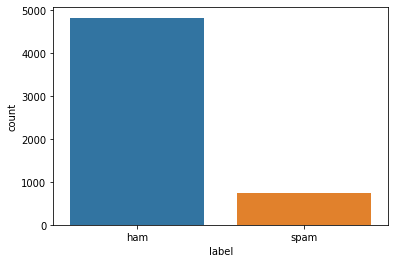

In [27]:
sns.countplot(data['label'])

In [7]:
data['label']=data['label'].replace('ham',0)
data['label']=data['label'].replace('spam',1)
data['label'].unique()

array([0, 1])

In [8]:
data.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [9]:
data.dtypes

label     int64
text     object
dtype: object

In [10]:
sentences=[]
labels=[]

In [11]:
sentences=data['text'].tolist()
labels=data['label'].tolist()

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
print(tf.__version__)

2.2.0


In [14]:
#Hyperparameters
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 4000

In [15]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [28]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [29]:
print(tokenizer.word_index)
print(testing_sentences[0])
print(testing_sequences[0])

{'<OOV>': 1, 'i': 2, 'to': 3, 'you': 4, 'a': 5, 'the': 6, 'u': 7, 'and': 8, 'in': 9, 'is': 10, 'me': 11, 'my': 12, 'for': 13, 'your': 14, 'it': 15, 'of': 16, 'have': 17, 'call': 18, 'on': 19, 'that': 20, 'now': 21, '2': 22, 'are': 23, 'not': 24, 'but': 25, 'so': 26, 'at': 27, 'or': 28, 'can': 29, 'be': 30, 'do': 31, 'get': 32, 'ur': 33, 'will': 34, "i'm": 35, 'just': 36, 'with': 37, 'if': 38, 'no': 39, 'we': 40, 'gt': 41, 'lt': 42, 'this': 43, 'up': 44, '4': 45, 'when': 46, 'ok': 47, 'free': 48, 'out': 49, 'from': 50, 'all': 51, 'how': 52, 'know': 53, 'go': 54, 'what': 55, 'then': 56, 'like': 57, 'am': 58, 'good': 59, 'got': 60, 'come': 61, 'love': 62, 'day': 63, 'time': 64, 'was': 65, 'its': 66, 'only': 67, 'there': 68, 'send': 69, 'as': 70, 'he': 71, 'text': 72, 'want': 73, 'txt': 74, 'going': 75, "i'll": 76, 'by': 77, 'one': 78, 'sorry': 79, 'still': 80, 'r': 81, 'lor': 82, 'about': 83, 'need': 84, 'home': 85, 'back': 86, 'n': 87, 'reply': 88, 'k': 89, 'today': 90, 'our': 91, 'dont'

### Sequence layers
RNN Neural network

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25,997
Trainable params: 25,997
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
125/125 [==============================] - 8s 61ms/step - loss: 0.3486 - accuracy: 0.8662 - val_loss: 0.1471 - val_accuracy: 0.8651
Epoch 2/50
125/125 [==============================] - 7s 57ms/step - loss: 0.1150 - accuracy: 0.9445 - val_loss: 0.0754 - val_accuracy: 0.9822
Epoch 3/50
125/125 [==============================] - 7s 58ms/step - loss: 0.0421 - accuracy: 0.9887 - val_loss: 0.0491 - val_accuracy: 0.9847
Epoch 4/50
125/125 [==============================] - 7s 58ms/step - loss: 0.0252 - accuracy: 0.9930 - val_loss: 0.0495 - val_accuracy: 0.9854
Epoch 5/50
125/125 [==============================] - 7s 56ms/step - loss: 0.0187 - accuracy: 0.9958 - val_loss: 0.0622 - val_accuracy: 0.9841
Epoch 6/50
125/125 [==============================] - 7s 57ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.0631 - val_accuracy: 0.9847
Epoch 7/50
125/125 [==============================] - 7s 57ms/step - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.0697 - val_accuracy: 0.9822

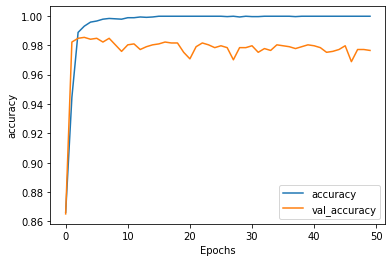

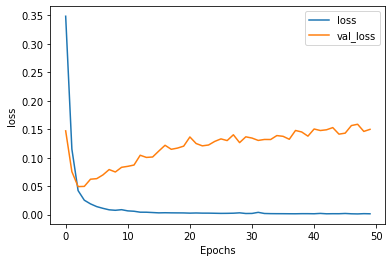

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

LSTM Neural network

In [33]:
Model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 28,941
Trainable params: 28,941
Non-trainable params: 0
_________________________________________________________________


In [34]:
num_epochs = 50
history = Model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
125/125 [==============================] - 9s 68ms/step - loss: 0.5252 - accuracy: 0.8545 - val_loss: 0.3954 - val_accuracy: 0.8651
Epoch 2/50
125/125 [==============================] - 8s 62ms/step - loss: 0.3918 - accuracy: 0.8662 - val_loss: 0.3890 - val_accuracy: 0.8651
Epoch 3/50
125/125 [==============================] - 8s 63ms/step - loss: 0.2712 - accuracy: 0.8955 - val_loss: 0.1058 - val_accuracy: 0.9758
Epoch 4/50
125/125 [==============================] - 8s 63ms/step - loss: 0.0772 - accuracy: 0.9787 - val_loss: 0.0604 - val_accuracy: 0.9847
Epoch 5/50
125/125 [==============================] - 8s 62ms/step - loss: 0.0440 - accuracy: 0.9893 - val_loss: 0.0527 - val_accuracy: 0.9860
Epoch 6/50
125/125 [==============================] - 8s 63ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0506 - val_accuracy: 0.9866
Epoch 7/50
125/125 [==============================] - 8s 66ms/step - loss: 0.0247 - accuracy: 0.9948 - val_loss: 0.0516 - val_accuracy: 0.9866

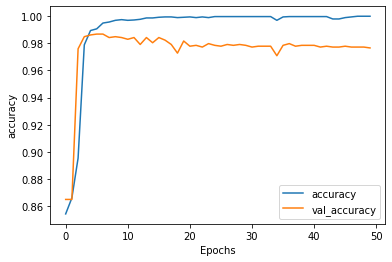

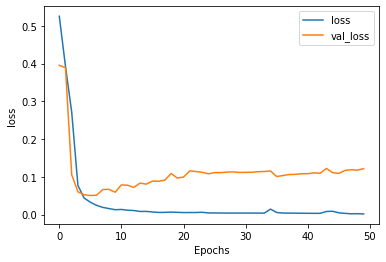

In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Convolution Neural network

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 27,149
Trainable params: 27,149
Non-trainable params: 0
_________________________________________________________________


In [37]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
125/125 [==============================] - 2s 13ms/step - loss: 0.3854 - accuracy: 0.8670 - val_loss: 0.2317 - val_accuracy: 0.8861
Epoch 2/50
125/125 [==============================] - 2s 12ms/step - loss: 0.1287 - accuracy: 0.9588 - val_loss: 0.0841 - val_accuracy: 0.9707
Epoch 3/50
125/125 [==============================] - 1s 12ms/step - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.0631 - val_accuracy: 0.9809
Epoch 4/50
125/125 [==============================] - 1s 12ms/step - loss: 0.0503 - accuracy: 0.9858 - val_loss: 0.0573 - val_accuracy: 0.9822
Epoch 5/50
125/125 [==============================] - 1s 12ms/step - loss: 0.0410 - accuracy: 0.9880 - val_loss: 0.0523 - val_accuracy: 0.9847
Epoch 6/50
125/125 [==============================] - 1s 12ms/step - loss: 0.0349 - accuracy: 0.9902 - val_loss: 0.0487 - val_accuracy: 0.9854
Epoch 7/50
125/125 [==============================] - 1s 12ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0476 - val_accuracy: 0.9854

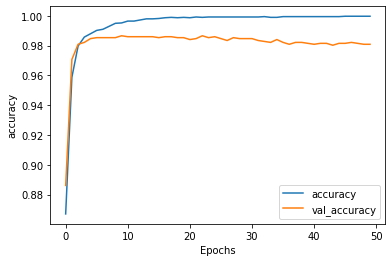

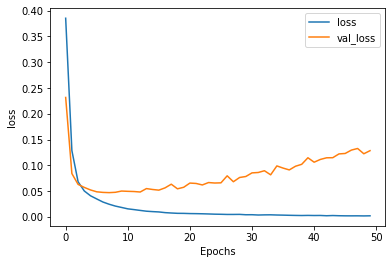

In [38]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Convolution neural networks(CNN) often used in computer vision such as image classification, Conv1D is used for sequences where as Conv2D is used for images.